In [ ]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")


In [ ]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [ ]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)


In [ ]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.3, random_state=101)

In [ ]:
sc_X = StandardScaler()
Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## NAIVE BAYES

In [ ]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
#print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.7736577829277713
F1 Score        :  0.4823321554770318
Precision       :  0.3812849162011173
Recall          :  0.65625


In [ ]:
print(classification_report(y_val,nbm_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2173
           1       0.38      0.66      0.48       416

    accuracy                           0.77      2589
   macro avg       0.65      0.73      0.67      2589
weighted avg       0.84      0.77      0.80      2589



## SVM

In [ ]:
svm = SVC(C=1.0,kernel='rbf',degree=9) #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8910776361529548
F1 Score        :  0.5816023738872403
Precision       :  0.7596899224806202
Recall          :  0.47115384615384615
Confusion Matrix:
  [[2111   62]
 [ 220  196]]


In [ ]:
print(classification_report(y_val,svm_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2173
           1       0.76      0.47      0.58       416

    accuracy                           0.89      2589
   macro avg       0.83      0.72      0.76      2589
weighted avg       0.88      0.89      0.88      2589



## RANDOM FOREST

In [ ]:
rfm = RandomForestClassifier(n_estimators=200,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest initial Performance:
----------------------------------
Accuracy        :  0.9038238702201622
F1 Score        :  0.6584362139917695
Precision       :  0.7667731629392971
Recall          :  0.5769230769230769
Confusion Matrix:
  [[2100   73]
 [ 176  240]]


In [ ]:
print(classification_report(y_val,rfm_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2173
           1       0.55      0.58      0.57       416

    accuracy                           0.86      2589
   macro avg       0.73      0.75      0.74      2589
weighted avg       0.86      0.86      0.86      2589



## GRADIENT BOOSTING

In [ ]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.906913866357667
F1 Score        :  0.6824769433465085
Precision       :  0.7551020408163265
Recall          :  0.6225961538461539
Confusion Matrix:
  [[2089   84]
 [ 157  259]]


In [ ]:
print(classification_report(y_val,gbm_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2173
           1       0.76      0.62      0.68       416

    accuracy                           0.91      2589
   macro avg       0.84      0.79      0.81      2589
weighted avg       0.90      0.91      0.90      2589



## ADABOOSTING

In [ ]:

abm = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME')
abm.fit(X_train,y_train)
abm_pred = abm.predict(X_val)

print('AdaBoost initial Performance:')
print('-----------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_pred))

AdaBoost initial Performance:
-----------------------------
Accuracy        :  0.8914638856701429
F1 Score        :  0.6326797385620916
Precision       :  0.6934097421203438
Recall          :  0.5817307692307693
Confusion Matrix:
  [[2066  107]
 [ 174  242]]


In [ ]:
print(classification_report(y_val,abm_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2173
           1       0.69      0.58      0.63       416

    accuracy                           0.89      2589
   macro avg       0.81      0.77      0.78      2589
weighted avg       0.89      0.89      0.89      2589



## K-NEAREST NEIGHBOR

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8779451525685593
F1 Score        :  0.4644067796610169
Precision       :  0.7873563218390804
Recall          :  0.3293269230769231
Confusion Matrix:
  [[2136   37]
 [ 279  137]]


In [ ]:
print(classification_report(y_val,knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2173
           1       0.79      0.33      0.46       416

    accuracy                           0.88      2589
   macro avg       0.84      0.66      0.70      2589
weighted avg       0.87      0.88      0.86      2589



## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rfm = DecisionTreeClassifier()
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('DECISION TREE initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

DECISION TREE initial Performance:
----------------------------------
Accuracy        :  0.8555426805716493
F1 Score        :  0.5651162790697674
Precision       :  0.5472972972972973
Recall          :  0.5841346153846154
Confusion Matrix:
  [[1972  201]
 [ 173  243]]


In [ ]:
print(classification_report(y_val,rfm_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2173
           1       0.55      0.58      0.57       416

    accuracy                           0.86      2589
   macro avg       0.73      0.75      0.74      2589
weighted avg       0.86      0.86      0.86      2589



## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)
xgb_model = xgb.XGBClassifier()
n=50
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate':1.0,
}

model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)
preds = model.predict(xgb_test)
preds = preds.astype(int)



print('XGBOOSTING initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, preds))
"""print('F1 Score        : ', metrics.f1_score(y_test, preds))
print('Precision       : ', metrics.precision_score(y_test,preds))
print('Recall          : ', metrics.recall_score(y_test,preds))
print('Confusion Matrix:\n ', confusion_matrix(y_test,preds))"""


XGBOOSTING initial Performance:
----------------------------------
Accuracy        :  0.8612612612612612


"print('F1 Score        : ', metrics.f1_score(y_test, preds))\nprint('Precision       : ', metrics.precision_score(y_test,preds))\nprint('Recall          : ', metrics.recall_score(y_test,preds))\nprint('Confusion Matrix:\n ', confusion_matrix(y_test,preds))"

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       956
           1       0.00      0.00      0.00       154

    accuracy                           0.86      1110
   macro avg       0.43      0.50      0.46      1110
weighted avg       0.74      0.86      0.80      1110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LIGHTGBM

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

# Predicting the Target variable
pred = model.predict(X_val)



[LightGBM] [Info] Number of positive: 1338, number of negative: 7293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 8631, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155023 -> initscore=-1.695739
[LightGBM] [Info] Start training from score -1.695739


In [ ]:
# evaluate lightgbm algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.006)


In [ ]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2173
           1       0.72      0.61      0.66       416

    accuracy                           0.90      2589
   macro avg       0.83      0.78      0.80      2589
weighted avg       0.89      0.90      0.90      2589



### CAT BOOST

Learning rate set to 0.053965
0:	learn: 0.6321624	test: 0.6298110	best: 0.6298110 (0)	total: 6.11ms	remaining: 6.11s
100:	learn: 0.2015854	test: 0.2022935	best: 0.2021607 (94)	total: 521ms	remaining: 4.64s
200:	learn: 0.1763102	test: 0.2014678	best: 0.1998588 (153)	total: 1.02s	remaining: 4.05s
300:	learn: 0.1562277	test: 0.2010194	best: 0.1998588 (153)	total: 1.55s	remaining: 3.59s
400:	learn: 0.1378882	test: 0.2000129	best: 0.1995900 (354)	total: 2.57s	remaining: 3.84s
500:	learn: 0.1231965	test: 0.2011123	best: 0.1995900 (354)	total: 3.9s	remaining: 3.89s
600:	learn: 0.1107387	test: 0.2028003	best: 0.1995900 (354)	total: 4.82s	remaining: 3.2s
700:	learn: 0.0993760	test: 0.2060144	best: 0.1995900 (354)	total: 6.03s	remaining: 2.57s
800:	learn: 0.0908526	test: 0.2072679	best: 0.1995900 (354)	total: 6.78s	remaining: 1.68s
900:	learn: 0.0829738	test: 0.2083703	best: 0.1995900 (354)	total: 7.42s	remaining: 815ms
999:	learn: 0.0762761	test: 0.2100414	best: 0.1995900 (354)	total: 7.92s	rem

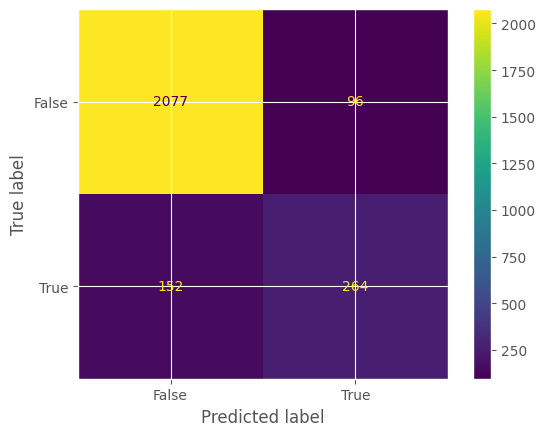

In [ ]:
from sklearn import metrics
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))
cb_pred = cb.predict(X_val)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val,cb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()


In [ ]:

print('F1 Score        : ', metrics.f1_score(y_val,cb_pred))
print('Precision       : ', metrics.precision_score(y_val,cb_pred))
print('Recall          : ', metrics.recall_score(y_val,cb_pred))


F1 Score        :  0.6804123711340205
Precision       :  0.7333333333333333
Recall          :  0.6346153846153846


In [ ]:
print(classification_report(y_val,cb_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2173
           1       0.73      0.63      0.68       416

    accuracy                           0.90      2589
   macro avg       0.83      0.80      0.81      2589
weighted avg       0.90      0.90      0.90      2589



## HYPERPARAMETERS

GRADIENTBOOSTING

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))

Accuracy        :  0.906913866357667


In [ ]:
gb= GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
parameters={"learning_rate":[0.01,0.02,0.03],
            "subsample":[0.9,0.5,0.2],
            "n_estimators":[100,500,1000],
            "max_depth":[4,6,8]
            }
grid=RandomizedSearchCV(estimator=gb,param_distributions=parameters,n_iter=5,scoring='roc_auc',cv=2,n_jobs=-1)
grid.fit(X_train,y_train)



RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.9, 0.5, 0.2]},
                   scoring='roc_auc')

In [ ]:
grid.best_score_

0.9269348222827667

XGBOOSTING

In [ ]:
params={
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10.12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10.12, 15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_score_

0.9248900047164547

RANDOM FOREST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param={
    "n_estimators":[int(x) for x in np.linspace(10,80,10)],
    "max_features":['auto','sqrt'],
    "max_depth":[2,4],
    "min_samples_leaf":[2,5],
    "bootstrap":[1,2]
}

In [ ]:
classifier=RandomForestClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [1, 2],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_score_

0.903576387537431

DECISION TREE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param={
    "criterion":['gini','entropy'],
    "max_features":['auto','sqrt'],
    "max_depth":[2,4],
    "min_samples_leaf":[2,5],

}

In [ ]:
classifier=DecisionTreeClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_score_

0.8340072111765362

ADABOOST

In [ ]:
gb=AdaBoostClassifier()
from sklearn.model_selection import RandomizedSearchCV
parameters={"learning_rate":[0.01,0.02,0.03],
            "algorithm":['SAMME','SAMME.R'],
            "n_estimators":[100,500,1000],
            "random_state":[100,200,300]
            }
grid=RandomizedSearchCV(estimator=gb,param_distributions=parameters,n_iter=5,scoring='roc_auc',cv=2,n_jobs=-1)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.02, 0.03],
                                        'n_estimators': [100, 500, 1000],
                                        'random_state': [100, 200, 300]},
                   scoring='roc_auc')

In [ ]:

random_search.best_score_

0.8340072111765362

LIGHTGBM

In [ ]:
params={
    "n_estimators":[100,200,300],
    "learning_rate":[0.01,0.05,0.1,0.3],
    "num_leaves":[20,50,80,100]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from lightgbm import LGBMClassifier
lgbmc= LGBMClassifier()#seed=seed,objective="multiclass"
grid_search=GridSearchCV(
    estimator=lgbmc,
    param_grid=params,
    n_jobs=-1,
    cv=3,
    scoring='accuracy',
    error_score=0

)
grid_result=grid_search.fit(X_train,y_train)

final_model=lgbmc.set_params(**grid_result.best_params_)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_val)

[LightGBM] [Info] Number of positive: 1338, number of negative: 7293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 8631, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155023 -> initscore=-1.695739
[LightGBM] [Info] Start training from score -1.695739
[LightGBM] [Info] Number of positive: 1338, number of negative: 7293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 8631, number of used features: 28
[LightGBM] [Info] [binar

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2173
           1       0.75      0.62      0.68       416

    accuracy                           0.91      2589
   macro avg       0.84      0.79      0.81      2589
weighted avg       0.90      0.91      0.90      2589



In [ ]:
print(lgbmc.score(X_val,y_val))

0.9057551178061027


In [ ]:
print('Accuracy        : ', metrics.accuracy_score(y_val,y_pred))
print('F1 Score        : ', metrics.f1_score(y_val,y_pred))
print('Precision       : ', metrics.precision_score(y_val,y_pred))
print('Recall          : ', metrics.recall_score(y_val,y_pred))
#print('Confusion Matrix:\n ', confusion_matrix(y_val,y_pred))


Accuracy        :  0.9057551178061027
F1 Score        :  0.6806282722513088
Precision       :  0.7471264367816092
Recall          :  0.625


### CATBOOST

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

# Create a CatBoost Pool
catboost_pool = Pool(X, label=y)

# Define the parameters for the CatBoost model
params = {
	'iterations': 2000,
	'learning_rate': 0.04,
	'depth': 11,
	'loss_function': 'MultiClass',
	'random_state': 42,
}

# Perform cross-validation using the cv function from CatBoost
cv_results, cv_model = cv(
	pool=catboost_pool,
	params=params,
	# Specify the number of folds for cross-validation
	fold_count=5,
	# Print information during training
	verbose=False,
	return_models=True
)


Training on fold [0/5]

bestTest = 0.2506968169
bestIteration = 278

Training on fold [1/5]

bestTest = 0.2144257002
bestIteration = 377

Training on fold [2/5]

bestTest = 0.2251352964
bestIteration = 330

Training on fold [3/5]

bestTest = 0.2329631511
bestIteration = 201

Training on fold [4/5]

bestTest = 0.2143528515
bestIteration = 230



In [ ]:

def Accuracy_Score(cv_model,y_test):
	score ={}
	for i, model in enumerate(cv_model):
		# Make predictions on the test data
		y_pred = model.predict(X_test,prediction_type='Class')
		# Calculate accuracy
		accuracy = accuracy_score(y_test, y_pred)
		score[i+1]=str(accuracy * 100)+'%'

	return  max(score.values())

Accuracy_Score(cv_model,y_test)


'98.73873873873875%'